## 1. Data Loading

In [2]:
import pandas as pd

customers = pd.read_csv(r"C:\Users\msiza\Downloads\Customers.csv")

transactions = pd.read_csv(r"C:\Users\msiza\Downloads\Transactions.csv")


In [3]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


## 2. Merging DataFrames

In [5]:
df = pd.merge(customers,transactions, on='CustomerID')


In [6]:
df

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64
...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40


## 3. Date Conversion and Feature Creation

In [7]:
import pandas as pd
from datetime import datetime  # Import the datetime module

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['AccountAge'] = (datetime.now() - customers['SignupDate']).dt.days


## 4. Transaction Aggregation

In [8]:
transaction_agg = transactions.groupby('CustomerID').agg(
    TotalTransactions=('TransactionID', 'count'),
    TotalSpend=('TotalValue', 'sum'),
    AvgPrice=('Price', 'mean'),
    TotalQuantity=('Quantity', 'sum'),
    TotalUniqueProducts=('ProductID', 'nunique'),
    LastTransactionDate=('TransactionDate', 'max')
).reset_index()


## 5. Recency Feature

In [9]:
transaction_agg['Recency'] = (datetime.now() - pd.to_datetime(transaction_agg['LastTransactionDate'])).dt.days


## 6. One-Hot Encoding for Categorical Features

In [10]:
region_encoded = pd.get_dummies(customers['Region'], prefix='Region')


## 7. Merging Customer Profile with Transaction Aggregates

In [11]:
# Merge the aggregated transaction data with the customer profile data
customer_profile = pd.merge(customers, transaction_agg, on='CustomerID', how='left')

# Add one-hot encoded region columns
customer_profile = pd.concat([customer_profile, region_encoded], axis=1)

# Drop columns that are no longer needed (e.g., CustomerName, SignupDate, etc.)
customer_profile = customer_profile.drop(columns=['CustomerName', 'SignupDate', 'LastTransactionDate'])

# Final selected features for clustering
print(customer_profile.head())


  CustomerID         Region  AccountAge  TotalTransactions  TotalSpend  \
0      C0001  South America         932                5.0     3354.52   
1      C0002           Asia        1079                4.0     1862.74   
2      C0003  South America         326                4.0     2725.38   
3      C0004  South America         841                8.0     5354.88   
4      C0005           Asia         896                3.0     2034.24   

     AvgPrice  TotalQuantity  TotalUniqueProducts  Recency  Region_Asia  \
0  278.334000           12.0                  5.0     85.0        False   
1  208.920000           10.0                  4.0     55.0         True   
2  195.707500           14.0                  4.0    155.0        False   
3  240.636250           23.0                  8.0     34.0        False   
4  291.603333            7.0                  3.0     84.0         True   

   Region_Europe  Region_North America  Region_South America  
0          False                 False   

In [12]:
customer_profile

,CustomerID,Region,AccountAge,TotalTransactions,TotalSpend,AvgPrice,TotalQuantity,TotalUniqueProducts,Recency,Region_Asia,Region_Europe,Region_North America,Region_South America
0,C0001,South America,932,5.0,3354.52,278.334000,12.0,5.0,85.0,False,False,False,True
1,C0002,Asia,1079,4.0,1862.74,208.920000,10.0,4.0,55.0,True,False,False,False
2,C0003,South America,326,4.0,2725.38,195.707500,14.0,4.0,155.0,False,False,False,True
3,C0004,South America,841,8.0,5354.88,240.636250,23.0,8.0,34.0,False,False,False,True
4,C0005,Asia,896,3.0,2034.24,291.603333,7.0,3.0,84.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,C0196,Europe,965,4.0,4982.88,416.992500,12.0,3.0,43.0,False,True,False,False
196,C0197,Europe,678,3.0,1928.65,227.056667,9.0,3.0,30.0,False,True,False,False
197,C0198,Europe,1065,2.0,931.83,239.705000,3.0,2.0,114.0,False,True,False,False
198,C0199,Europe,786,4.0,1979.28,250.610000,9.0,4.0,93.0,False,True,False,False


## 8. Dropping Unnecessary Columns

In [13]:
# Select relevant numerical features for clustering (excluding categorical ones)
numerical_features = customer_profile[['AccountAge', 'TotalTransactions', 'TotalSpend', 
                                       'AvgPrice', 'TotalQuantity', 'TotalUniqueProducts', 'Recency']]

# One-hot encoded Region columns should also be included (they are already in the dataframe)
region_columns = [col for col in customer_profile.columns if col.startswith('Region_')]
numerical_features = pd.concat([numerical_features, customer_profile[region_columns]], axis=1)


## 10. Imputation of Missing Data

In [15]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
numerical_features_imputed = imputer.fit_transform(numerical_features)

# Verify if imputation worked
print(pd.DataFrame(numerical_features_imputed).isnull().sum())


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64


## 12. Clustering with K-Means and Davies-Bouldin Evaluation

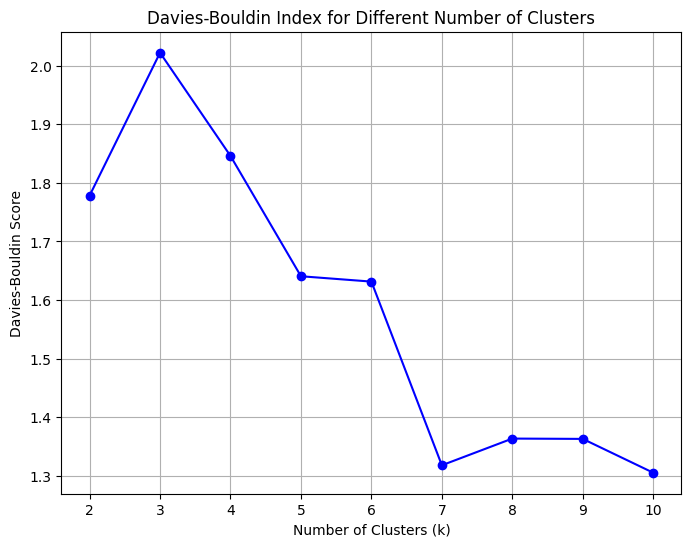

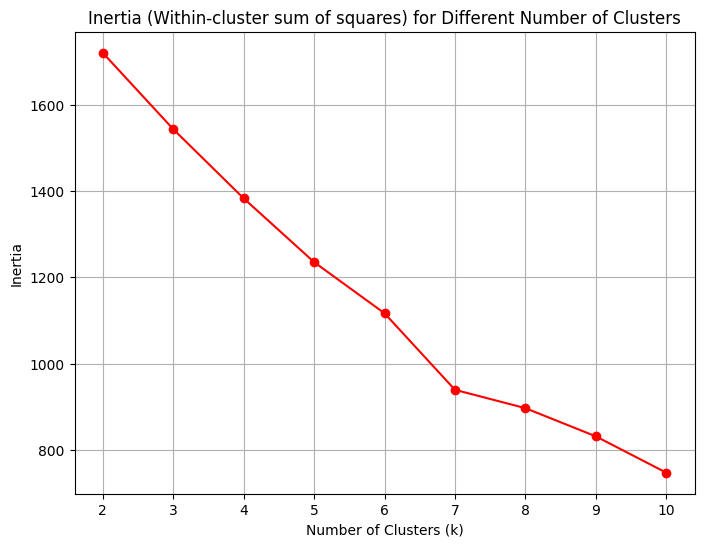

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming 'customer_profile' DataFrame is already loaded and cleaned

# Select relevant numerical features for clustering
numerical_features = customer_profile[['AccountAge', 'TotalTransactions', 'TotalSpend', 'AvgPrice', 'TotalQuantity', 'TotalUniqueProducts', 'Recency']]

# Include one-hot encoded region columns
region_columns = [col for col in customer_profile.columns if col.startswith('Region_')]
numerical_features = pd.concat([numerical_features, customer_profile[region_columns]], axis=1)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
numerical_features_imputed = imputer.fit_transform(numerical_features)

# Standardize the numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(numerical_features_imputed)

# Initialize lists to store the Davies-Bouldin scores and inertia
db_scores = []
inertia_values = []

# Fit KMeans for cluster sizes from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    
    # Calculate Davies-Bouldin Index for evaluating clustering
    db_score = davies_bouldin_score(features_scaled, kmeans.labels_)
    db_scores.append(db_score)
    
    # Store the inertia value for comparison
    inertia_values.append(kmeans.inertia_)

# Plot the Davies-Bouldin score for each k (number of clusters)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), db_scores, marker='o', linestyle='-', color='b', label='Davies-Bouldin Score')
plt.title('Davies-Bouldin Index for Different Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)
plt.show()

# Plot the Inertia (Within-cluster sum of squares) for Different Number of Clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='-', color='r', label='Inertia')
plt.title('Inertia (Within-cluster sum of squares) for Different Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
